### Homework 3.3 - Please Help The Cat

A poor cat is trapped on canvas by an evil witch. Please help releasing the cat by breaking the curse using Discrete Fourier Transform learned in our magic class.

You may find the image at `images/poor-cat-trapped-on-canvas.jpg`. Note that the image has 3 color channels (RGB).

Please remember that the examples shown in class uses the book of spells from the ancient library. Try searching the newer spells on the internet.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

<img src="images/poor-cat-trapped-on-canvas.jpg" alt="A poor cat trapped on canvas" width="400">

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab as py
import cv2
from scipy import misc, fftpack
%matplotlib inline

1. Read the picture and extract its gray image (image[:,:,0])
2. Use .fft2 to apply Fast Fourier Transform on 2-D array data which is the image data
3. Use .fftshift to coincide the image with the origin image

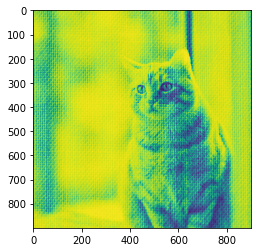

In [67]:
image = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg')

im0 = image[:,:,0]

norm = np.sqrt(im0.shape[0] * im0.shape[1])

D1 = fftpack.fft2(im0)/norm
D2 = fftpack.fftshift(D1)/norm

py.imshow(im0, aspect = 1)
py.show()

4. Create mask. In this case, I used Gaussian Blur filter by using formula:
$$G(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}}$$
5. The original value of $\sigma$ is 0.84089642. By changing the value, the intensity of the filter is changed.

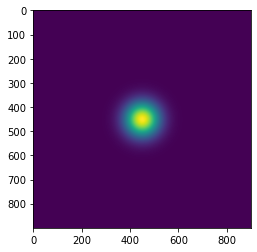

In [68]:
n = 901
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

R = 60

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

smol_sigma = 50
M = (1/2*np.pi*smol_sigma**2) * np.exp(- (X**2 + Y**2)/( 2*smol_sigma**2))

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.fftshift(D1_mask)
D3_mask = fftpack.fft2(D1_mask)/n

plt.imshow(np.abs(D3_mask))

6. Multiply the shifted and transformed image with the mask. This applies the image with the filter
7. Shift the filtered image back to its original arrangement and use Inverse Fourier Transform on the image to reverse the FFT effects.


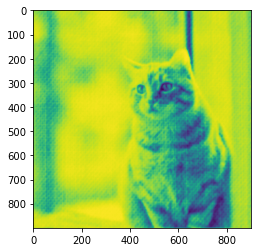

In [69]:
filtered = D2 * M
clean_im = fftpack.fftshift(filtered)
inv_img = fftpack.ifft2(clean_im)
new_f_clean = np.abs(inv_img)

plt.imshow(new_f_clean)
# plt.imshow(new_f_clean, cmap=plt.get_cmap('gray'))